<a href="https://colab.research.google.com/github/Aravindkaturi/AIML-lab/blob/main/AIML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: K.Aravind

Htno: 2203A51140

Sub: AIML

Batch: 03


## AIML Project

# **News Article categorization using Multinomial Naive Bayes  **

In [2]:
pip install --user -U nltk

In [4]:
# Import libraries

import pandas as pd
import re

import nltk
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.metrics  import classification_report
from sklearn import metrics
import time

In [16]:
# Read the dataset from csv file
df1 = pd.read_csv('/content/BBC News Train.csv')
df1.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [17]:
# Find all category
category = list(df1['Category'].unique())
category

['business', 'tech', 'politics', 'sport', 'entertainment']

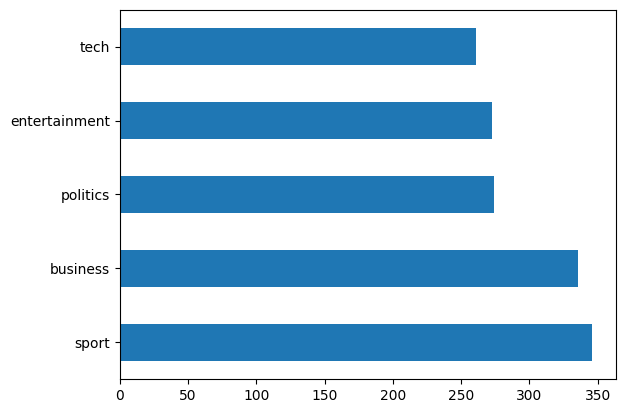

In [18]:
df1['Category'].value_counts().plot(kind='barh')
plt.show()

In [19]:
# Check null values
df1.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [31]:
# Text preprocessing
def preprocess(text):

    """
    Function: split text into words and return the root form of the words
    Args:
      text(str): the article
    Return:
      lem(list of str): a list of the root form of the article words
    """

    # Normalize text
    text = re.sub(r"[^a-zA-Z]", " ", str(text).lower())

    # Tokenize text
    token = word_tokenize(text)

    # Remove stop words
    stop = stopwords.words("english")
    words = [t for t in token if t not in stop]

    # Lemmatization
    lem = [WordNetLemmatizer().lemmatize(w) for w in words]

    return lem

In [32]:
df1["Preprocessed_Text"] = df1['Text'].apply(lambda x: preprocess(x))
df1.head(10)

,ArticleId,Text,Category,Preprocessed_Text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,"[worldcom, ex, bos, launch, defence, lawyer, d..."
1,154,german business confidence slides german busin...,business,"[german, business, confidence, slide, german, ..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,"[bbc, poll, indicates, economic, gloom, citize..."
3,1976,lifestyle governs mobile choice faster bett...,tech,"[lifestyle, governs, mobile, choice, faster, b..."
4,917,enron bosses in $168m payout eighteen former e...,business,"[enron, boss, payout, eighteen, former, enron,..."
5,1582,howard truanted to play snooker conservative...,politics,"[howard, truanted, play, snooker, conservative..."
6,651,wales silent on grand slam talk rhys williams ...,sport,"[wale, silent, grand, slam, talk, rhys, willia..."
7,1797,french honour for director parker british film...,entertainment,"[french, honour, director, parker, british, fi..."
8,2034,car giant hit by mercedes slump a slump in pro...,business,"[car, giant, hit, mercedes, slump, slump, prof..."
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,"[fockers, fuel, festive, film, chart, comedy, ..."


In [33]:
# Find the common words in each category
def find_common_words(df, category):

    """
    Function: find the most frequent words in the category and return the them
    Args:
      df(dataframe): the dataframe of articles
      category(str): the category name
    Return:
      the most frequant words in the category
    """

    # Create dataframes for the category
    cat_df = df[df["Category"]==category]

    # Initialize words list for the category
    words = [word for tokens in cat_df["Preprocessed_Text"] for word in tokens]

    # Count words frequency
    words_counter = Counter(words)

    return words_counter.most_common(10)

In [34]:
print("Most common words in each category")
for c in category:
    print(c, " News")
    print(find_common_words(df1, c))
    print()

Most common words in each category
business  News
[('said', 1100), ('year', 618), ('bn', 535), ('u', 523), ('mr', 394), ('company', 393), ('firm', 374), ('market', 346), ('would', 309), ('also', 279)]

tech  News
[('said', 1064), ('people', 647), ('mobile', 437), ('phone', 396), ('game', 396), ('technology', 380), ('service', 371), ('one', 367), ('year', 364), ('mr', 350)]

politics  News
[('said', 1445), ('mr', 1100), ('would', 712), ('labour', 494), ('election', 479), ('government', 471), ('party', 464), ('blair', 396), ('minister', 373), ('people', 372)]

sport  News
[('said', 636), ('game', 487), ('year', 448), ('first', 350), ('win', 337), ('time', 336), ('england', 329), ('player', 311), ('two', 290), ('back', 279)]

entertainment  News
[('film', 721), ('said', 594), ('year', 450), ('best', 430), ('award', 336), ('u', 290), ('also', 277), ('one', 274), ('show', 273), ('star', 259)]



In [35]:
df1['Preprocessed_Text2'] = df1['Preprocessed_Text'].apply(' '.join)
df1.head()

,ArticleId,Text,Category,Preprocessed_Text,Preprocessed_Text2
0,1833,worldcom ex-boss launches defence lawyers defe...,business,"[worldcom, ex, bos, launch, defence, lawyer, d...",worldcom ex bos launch defence lawyer defendin...
1,154,german business confidence slides german busin...,business,"[german, business, confidence, slide, german, ...",german business confidence slide german busine...
2,1101,bbc poll indicates economic gloom citizens in ...,business,"[bbc, poll, indicates, economic, gloom, citize...",bbc poll indicates economic gloom citizen majo...
3,1976,lifestyle governs mobile choice faster bett...,tech,"[lifestyle, governs, mobile, choice, faster, b...",lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,"[enron, boss, payout, eighteen, former, enron,...",enron boss payout eighteen former enron direct...


In [36]:
# Determine data and target
X = df1['Preprocessed_Text2']
y = df1['Category']

In [38]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [39]:
# Use TF-IDF
tf_vec = TfidfVectorizer()
train_features = tf_vec.fit(X_train)
train_features = tf_vec.transform(X_train)
test_features = tf_vec.transform(X_test)

In [40]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):

    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of the model training time and classification report
    """
    results ={}

    # Start time
    start = time.time()
    # Train the model
    model.fit(train_features, y_train)
    # End time
    end = time.time()
    # Calculate the training time
    results['train_time'] = end - start

    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)

     # Classification report
    results['classification_report'] = classification_report(y_test, test_predicted)

    return results

In [52]:
# Initialize the models
nb = MultinomialNB()


# Fit and evaluate models
results = {}
for cls in [nb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, train_features, y_train, test_features, y_test)

In [53]:
# Print classifiers results
for res in results:
    print (res)
    print()
    for i in results[res]:
        print (i, ':')
        print(results[res][i])
        print()
    print ('-----')
    print()

MultinomialNB

train_time :
0.07135891914367676

classification_report :
               precision    recall  f1-score   support

     business       0.95      1.00      0.97        70
entertainment       1.00      0.91      0.95        58
     politics       0.98      0.95      0.96        56
        sport       0.94      0.99      0.96        68
         tech       0.98      0.98      0.98        46

     accuracy                           0.97       298
    macro avg       0.97      0.96      0.97       298
 weighted avg       0.97      0.97      0.97       298


-----



In [54]:
# Classify an article
def classify_article(path):

    """
    Function: classify an article.
    Args:
      path: the path of the article
    Return:
      category (str): the category of the article
    """
    # Read file
    file = open(path, 'r')
    artcl = file.read()

    # Text preprocessing
    artcl = preprocess(artcl)
    artcl = ' '.join(artcl)

    # Use TF_IDF
    test = tf_vec.transform([artcl])

    # Use MultinomialNB model to classify the article
    predict = nb.predict(test)
    category = predict[0]

    # Close file
    file.close()

    return category

In [55]:
print(classify_article('/content/Articles/art1.txt'))

sport


In [56]:
print(classify_article('/content/Articles/art2.txt'))

business


In [57]:
print(classify_article('/content/Articles/art3.txt'))

politics


In [58]:
print(classify_article('/content/Articles/art4.txt'))

entertainment
